<a href="https://colab.research.google.com/github/narayan-bhattarai/AI-Classification/blob/main/Fashion_MNIST_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
#from ipywidgets import interact, FloatLogSlider, IntSlider, Dropdown

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def visualize_activations(model, data_loader, layer_name='conv1'):
    model.eval()
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images = images[:5].to(device)

    with torch.no_grad():
        if layer_name == 'conv1':
            activations = F.relu(model.conv1(images))
        else:
            x = F.relu(model.conv1(images))
            x = model.pool(x)
            activations = F.relu(model.conv2(x))

    act = activations.cpu().numpy()
    fig, axes = plt.subplots(5, 8, figsize=(12, 6))
    for i in range(5):
        for j in range(8):
            axes[i, j].imshow(act[i, j, :, :], cmap='gray')
            axes[i, j].axis('off')
    plt.suptitle(f'Feature Maps ({layer_name})')
    plt.show()

In [ ]:
def train(model, train_loader, epochs=3):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

In [ ]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f'Test Accuracy: {acc:.2f}%')

In [ ]:
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
test(model, test_loader)

Test Accuracy: 7.66%


Visualizing Activations Before Training...


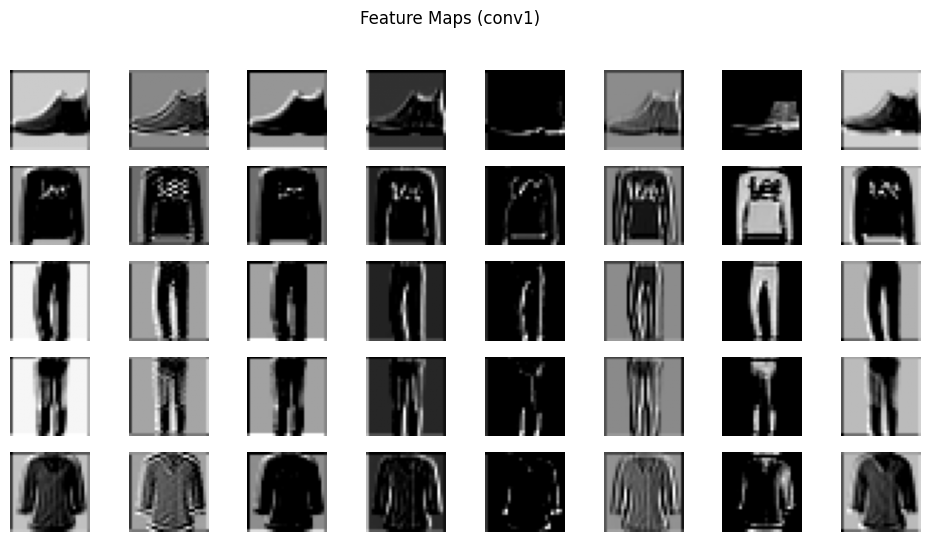

In [ ]:
print("Visualizing Activations Before Training...")
visualize_activations(model, test_loader, layer_name='conv1')

In [ ]:
train(model, train_loader, epochs=10)

Epoch [1/10], Loss: 0.4798, Accuracy: 82.77%
Epoch [2/10], Loss: 0.3181, Accuracy: 88.49%
Epoch [3/10], Loss: 0.2720, Accuracy: 89.99%
Epoch [4/10], Loss: 0.2440, Accuracy: 91.01%
Epoch [5/10], Loss: 0.2201, Accuracy: 91.84%
Epoch [6/10], Loss: 0.1999, Accuracy: 92.57%
Epoch [7/10], Loss: 0.1837, Accuracy: 93.20%
Epoch [8/10], Loss: 0.1672, Accuracy: 93.77%
Epoch [9/10], Loss: 0.1546, Accuracy: 94.18%
Epoch [10/10], Loss: 0.1394, Accuracy: 94.89%


Visualizing Activations After Training...


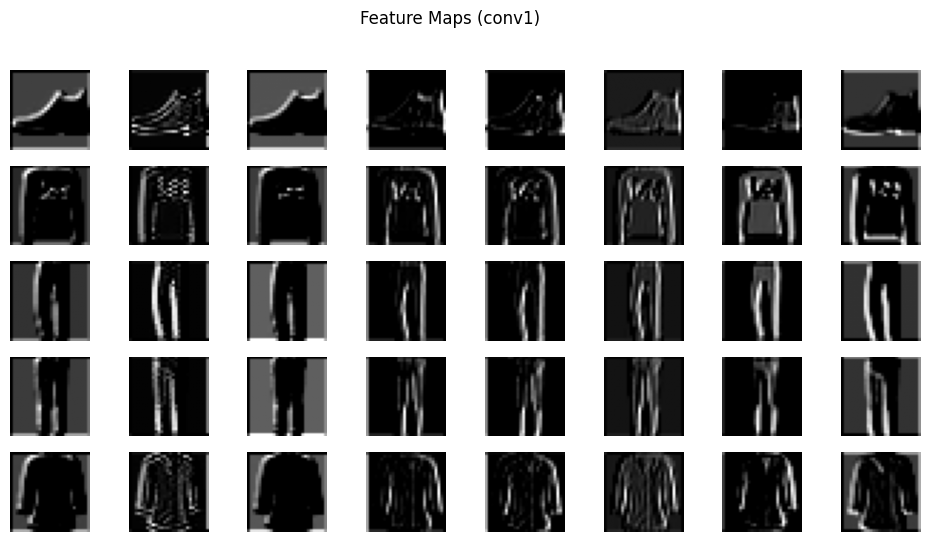

In [ ]:
print("Visualizing Activations After Training...")
visualize_activations(model, test_loader, layer_name='conv1')

In [ ]:
test(model, test_loader)

Test Accuracy: 90.96%


1. Model Architecture Improvements

The original Fashion-MNIST CNN is simple and can struggle to catch texture details. Adding BatchNorm, Dropout, and one extra convolution block improves feature extraction and prevents overfitting.

2. Data Augmentation

Simple augmentations like random rotation (5–10°) or slight horizontal shift improve generalization. Fashion-MNIST images are grayscale and centered, so augmentation should be lightweight.

3. Optimizer & LR Scheduler

Switching from Adam to AdamW gives better weight decay handling. Using StepLR or ReduceLROnPlateau helps avoid plateaus during training.

4. Regularization

Dropout in fully connected layers and a small weight decay value reduce overfitting and improve accuracy on test data.

5. Training Strategy

Training for 8–12 epochs is usually enough. Using larger batch sizes (64–128) speeds up training without hurting accuracy.

Using: cuda


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.31MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.6MB/s]


Epoch 1/10, Loss: 0.3944, Accuracy: 85.93%
Epoch 2/10, Loss: 0.2703, Accuracy: 90.14%
Epoch 3/10, Loss: 0.2326, Accuracy: 91.58%
Epoch 4/10, Loss: 0.2058, Accuracy: 92.52%
Epoch 5/10, Loss: 0.1854, Accuracy: 93.18%
Epoch 6/10, Loss: 0.1715, Accuracy: 93.79%
Epoch 7/10, Loss: 0.1569, Accuracy: 94.41%
Epoch 8/10, Loss: 0.1428, Accuracy: 94.81%
Epoch 9/10, Loss: 0.1328, Accuracy: 95.09%
Epoch 10/10, Loss: 0.1175, Accuracy: 95.58%


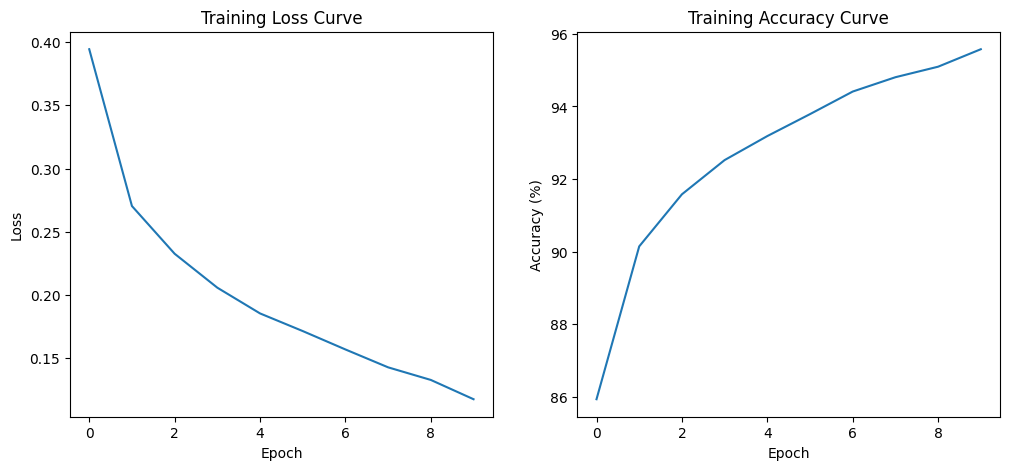


Final Test Accuracy: 93.18%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

# -------------------------------
# Light Data Augmentation
# -------------------------------
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# -------------------------------
# Load Fashion MNIST Dataset
# -------------------------------
train_dataset = datasets.FashionMNIST(
    root="./data", train=True,
    transform=train_transform, download=True
)

test_dataset = datasets.FashionMNIST(
    root="./data", train=False,
    transform=test_transform, download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# -------------------------------
# Improved Fashion-MNIST CNN
# -------------------------------
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.MaxPool2d(2, 2),   # 14x14

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),

            nn.MaxPool2d(2, 2)    # 7x7
        )

        self.fc = nn.Sequential(
            nn.Linear(128 * 7 * 7, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


model = FashionCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------------
# Training Function
# -------------------------------
def train_model(epochs=10):
    losses, accs = [], []

    for epoch in range(epochs):
        model.train()
        total, correct, epoch_loss = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        losses.append(epoch_loss / len(train_loader))
        accs.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {losses[-1]:.4f}, Accuracy: {accs[-1]:.2f}%")

    return losses, accs

# Train the model
losses, accs = train_model()

# -------------------------------
# Plot Curves
# -------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accs)
plt.title("Training Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.show()

# -------------------------------
# Evaluate on Test Set
# -------------------------------
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nFinal Test Accuracy: {100 * correct / total:.2f}%")
